# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
filepath = '/content/drive/My Drive/Colab Notebooks/Assignments/As19_Backpropagation and Gradient Checking/'

In [3]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open(filepath+'data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

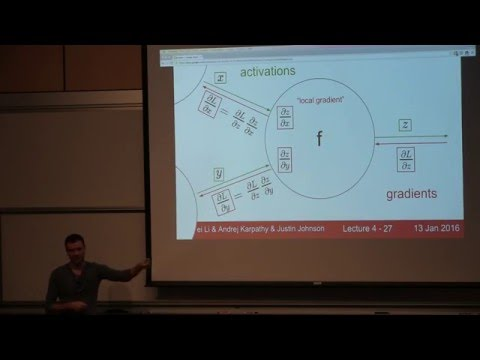

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

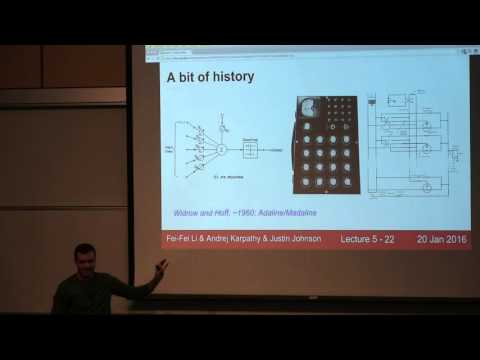

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>



## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [6]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation
    sig = 1 / (1+ np.exp(-z))

    return sig
    
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig variables

        exp = np.exp((w[0]*x[0] + w[1]*x[1])**2 + w[5])
        tanh = np.tanh(exp + w[6])
        sig = sigmoid(np.sin(w[2]*x[2]) * (w[3]*x[3] + w[4]*x[4]) + w[7])
        y_hat = w[8]*sig + tanh

        loss = (y - y_hat)**2
        dL_yhat = -2*(y - y_hat)

        fp_dict = {'exp': exp, 'tanh': tanh, 'sigmoid': sig, 'loss': loss, 'dy_pr': dL_yhat, 'y_hat': y_hat}

        return fp_dict

<font color='cyan'>Grader function - 1</font>

In [7]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [8]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [9]:
def backward_propagation(x,W,dict):
    '''In this function, we will compute the backward propagation '''
    # x : current data point for which we are calculating Loss
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    # return dW, dW is a dictionary with gradients of all the weights

    dw9 = dict['dy_pr'] * dict['sigmoid']
    dw8 = dict['dy_pr'] * W[8] * dict['sigmoid'] * (1- dict['sigmoid'])
    dw7 = dict['dy_pr'] * (1-dict['tanh']**2)
    dw6 = dict['dy_pr'] * (1-dict['tanh']**2) * dict['exp']
    dw5 = dict['dy_pr'] * W[8] * dict['sigmoid']*(1- dict['sigmoid'])*np.sin(W[2]*x[2])*x[4]
    dw4 = dict['dy_pr'] * W[8] * dict['sigmoid']*(1- dict['sigmoid'])*np.sin(W[2]*x[2])*x[3] 
    dw3 = dict['dy_pr'] * W[8] * dict['sigmoid']*(1- dict['sigmoid'])* (W[3]*x[3] + W[4]*x[4]) * np.cos(W[2]*x[2]) * x[2]
    dw2 = dict['dy_pr'] * (1- dict['tanh']**2) * dict['exp']*2*((W[0]*x[0] + W[1]*x[1]) * x[1])
    dw1 = dict['dy_pr'] * (1- dict['tanh']**2) * dict['exp']*2*((W[0]*x[0] + W[1]*x[1]) * x[0])

    dW = {'dw1': dw1, 'dw2': dw2, 'dw3': dw3, 'dw4': dw4, 'dw5': dw5, 'dw6': dw6, 'dw7': dw7, 'dw8': dw8, 'dw9': dw9}

    return dW

<font color='cyan'>Grader function - 3 </font>

In [10]:
def grader_backprop(data):
    dw1=(data['dw1']==-0.22973323498702003)
    dw2=(data['dw2']==-0.021407614717752925)
    dw3=(data['dw3']==-0.005625405580266319)
    dw4=(data['dw4']==-0.004657941222712423)
    dw5=(data['dw5']==-0.0010077228498574246)
    dw6=(data['dw6']==-0.6334751873437471)
    dw7=(data['dw7']==-0.561941842854033)
    dw8=(data['dw8']==-0.04806288407316516)
    dw9=(data['dw9']==-1.0181044360187037)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [11]:
# W = initilize_randomly
def gradient_checking(x, y, W, epsilon = 0.0001, verbose = False):
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    fp_dict = forward_propagation(x, y, W)     
    grads = np.array(list(backward_propagation(x, W, fp_dict).values()))

    approx_gradients = []
    # for each wi weight value in W:
    #     # add a small value to weight wi, and then find the values of L with the updated weights
    #     # subtract a small value to weight wi, and then find the values of L with the updated weights
    #     # compute the approximation gradients of weight wi
    #     approx_gradients.append(approximation gradients of weight wi)
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula

    for i, wi in enumerate(W):
        W_copy = W.copy()             # Changes made to one do not change other (deep copy)
        W_copy[i] = wi + epsilon
        L_plus = forward_propagation(x, y, W_copy)['loss']    # Loss with updated wi

        W_copy[i] = wi - epsilon
        L_minus = forward_propagation(x, y, W_copy)['loss']   # Loss with updated wi

        dw_approx = (L_plus - L_minus) / (2*epsilon)          # approx gradient with respect to wi
        approx_gradients.append(dw_approx)

    numerator = np.linalg.norm(grads - approx_gradients)
    denominator = np.linalg.norm(grads) + np.linalg.norm(approx_gradients)
    gradient_check = numerator/denominator                    # gradient check formula
    
    if verbose:
        if gradient_check < 1e-7:
            print('The gradient is correct')
        else:
            print('The gradient is incorrect')

    return gradient_check

In [12]:
W = np.random.rand(9)

for i in range(len(y[:10])):
    grad_check = gradient_checking(X[i], y[i], W)
    print(grad_check, ' -  is less than 1e-7 : ', grad_check < 1e-7)

2.0058800971327945e-10  -  is less than 1e-7 :  True
3.214287262347528e-10  -  is less than 1e-7 :  True
3.153138920200914e-10  -  is less than 1e-7 :  True
5.581341266075697e-10  -  is less than 1e-7 :  True
4.717316103353972e-10  -  is less than 1e-7 :  True
3.7815268494501994e-10  -  is less than 1e-7 :  True
2.865108938732613e-10  -  is less than 1e-7 :  True
2.940068221484451e-10  -  is less than 1e-7 :  True
3.350693548802492e-10  -  is less than 1e-7 :  True
2.8768144753104013e-10  -  is less than 1e-7 :  True


# <font color='red'>Task 2: Optimizers

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [65]:
# Initializing the weights that follow normal distribution
w = np.random.normal(loc=0.0, scale=0.01, size=9)

epochs = 100
eta = 0.1       # Learning rate
epoch_losses = []
for epoch in range(1,epochs):                                                  # For each epoch
    point_losses = []
    for i in range(X.shape[0]):                                                # For each data point
        fp_dict = forward_propagation(X[i], y[i], w)                           # Forward propagation
        dw = np.array(list(backward_propagation(X[i], w, fp_dict).values()))   # Compute gradients
        point_losses.append(fp_dict['loss'])                                   # Append loss for that point
        for j in range(len(w)):                                                # Update for each weight
            w[j] -= eta * dw[j]                                                
    
    epoch_loss = np.mean(point_losses)                                         # Epoch loss
    print('Loss at {} epoch : '.format(epoch), epoch_loss)

    # Break the loop if update is miniscule or loss increases than previous loss
    if len(epoch_losses) > 1:
        if abs(epoch_loss - epoch_losses[-1]) < 0.0000001 or epoch_loss > epoch_losses[-1]:
            break
    epoch_losses.append(epoch_loss)           # Update epoch losses until the loop is broken or end of epochs

Loss at 1 epoch :  0.028611375966694344
Loss at 2 epoch :  0.010452241170514558
Loss at 3 epoch :  0.0014769202720354316
Loss at 4 epoch :  0.0007484372209185959
Loss at 5 epoch :  0.0006210805984894949
Loss at 6 epoch :  0.000555726402167812
Loss at 7 epoch :  0.0005001800271968151
Loss at 8 epoch :  0.0004474790290174584
Loss at 9 epoch :  0.0003978399095651521
Loss at 10 epoch :  0.0003519718031798327
Loss at 11 epoch :  0.00031022390152952626
Loss at 12 epoch :  0.0002726448798997021
Loss at 13 epoch :  0.00023910066764410814
Loss at 14 epoch :  0.00020935299925098344
Loss at 15 epoch :  0.00018310797882872492
Loss at 16 epoch :  0.00016004725563412421
Loss at 17 epoch :  0.00013984865474174046
Loss at 18 epoch :  0.0001221997359245701
Loss at 19 epoch :  0.00010680629008611146
Loss at 20 epoch :  9.339715328343006e-05
Loss at 21 epoch :  8.172638749536287e-05
Loss at 22 epoch :  7.157364587192723e-05
Loss at 23 epoch :  6.274334994362346e-05
Loss at 24 epoch :  5.506314550256023e-

<font color='blue'>Plot between epochs and loss</font>

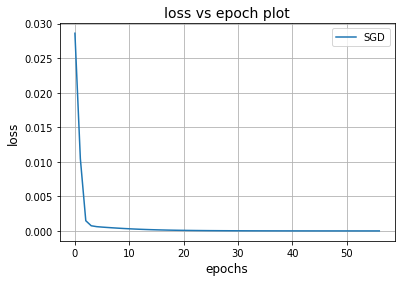

In [66]:
SGD_losses = epoch_losses
plt.plot(range(len(SGD_losses)), SGD_losses, label = 'SGD')
plt.xlabel('epochs', fontsize= 12) 
plt.ylabel('loss', fontsize = 12)    
plt.title('loss vs epoch plot', fontsize= 14)
plt.legend()
plt.grid(True)                        
plt.show()

###<font color='blue'>Algorithm with Momentum update of weights</font>

In [67]:
# Initializing the weights that follow normal distribution
w = np.random.normal(loc=0.0, scale=0.01, size=9)

epochs = 100
eta = 0.1           # Learning rate
beta = 0.9          # decay factor
epoch_losses = []
previous_vt = np.zeros(len(w))
for epoch in range(1,epochs):                                                 # For each epoch
    point_losses = []
    for i in range(X.shape[0]):                                               # For each data point
        fp_dict = forward_propagation(X[i], y[i], w)        
        dw = np.array(list(backward_propagation(X[i], w, fp_dict).values()))  # Compute gradients
        point_losses.append(fp_dict['loss'])
        
        # previous_vt = np.zeros(len(w))
        for j in range(len(w)):                                              # For each weight
            vt = beta*previous_vt[j] + eta*dw[j]                             # Moment term
            w[j] -= vt                                                       # update weight   
            previous_vt[j] = vt

    epoch_loss = np.mean(point_losses)                                       # epoch loss
    print('Loss at {} epoch : '.format(epoch), epoch_loss)

    # Break the loop if update is miniscule or loss increases than previous loss
    if len(epoch_losses) > 1:
        if abs(epoch_loss - epoch_losses[-1]) < 0.0000001 or epoch_loss > epoch_losses[-1]:
            break
    epoch_losses.append(epoch_loss)             # Update epoch losses until loop is broken or end of epochs

Loss at 1 epoch :  0.05634076481265729
Loss at 2 epoch :  0.005412772826473293
Loss at 3 epoch :  0.0033087366592240725
Loss at 4 epoch :  0.0026549479163475134
Loss at 5 epoch :  0.002211055849977856
Loss at 6 epoch :  0.0016317186764919706
Loss at 7 epoch :  0.001114145370198883
Loss at 8 epoch :  0.0006789622431608816
Loss at 9 epoch :  0.00038296564235025635
Loss at 10 epoch :  0.0002040572180390536
Loss at 11 epoch :  0.0001055328332114485
Loss at 12 epoch :  5.403656607231446e-05
Loss at 13 epoch :  2.7749997334729493e-05
Loss at 14 epoch :  1.4395389632527521e-05
Loss at 15 epoch :  7.595526534656053e-06
Loss at 16 epoch :  4.117352416417476e-06
Loss at 17 epoch :  2.327706074545656e-06
Loss at 18 epoch :  1.399752268833747e-06
Loss at 19 epoch :  9.136255367040317e-07
Loss at 20 epoch :  6.554389294224579e-07
Loss at 21 epoch :  5.158218376374927e-07
Loss at 22 epoch :  4.385722319283851e-07


<font color='blue'>Plot between epochs and loss</font>

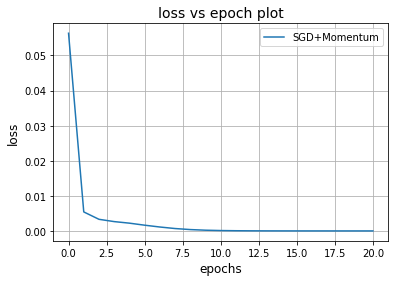

In [68]:
SGD_momentum_losses = epoch_losses

plt.plot(range(len(SGD_momentum_losses)), SGD_momentum_losses, label = 'SGD+Momentum')
plt.xlabel('epochs', fontsize= 12) 
plt.ylabel('loss', fontsize = 12)    
plt.title('loss vs epoch plot', fontsize= 14)
plt.legend()
plt.grid(True)                        
plt.show()

###<font color='blue'>Algorithm with Adam update of weights</font>

In [69]:
# Initilaizing the weights
w = np.random.normal(0, 0.01, 9)
epsilon = 0.001      # Small error
epochs = 100
eta = 0.1       # learning rate
beta_1 = 0.9    # decay factor for first moment
beta_2 = 0.99   # decay factor for second moment

epoch_losses = []
previous_mt = np.zeros(len(w))                                        # previous first moment
previous_vt = np.zeros(len(w))                                        # previous second moment
for epoch in range(1, epochs):                                                # For each epoch
    point_losses = []   
    for i in range(X.shape[0]):                                               # For each datapoint
        fp_dict = forward_propagation(X[i], y[i], w)                          # Forward propagation
        dw = np.array(list(backward_propagation(X[i], w, fp_dict).values()))  # Compute gradients
        point_losses.append(fp_dict['loss'])                                  # append loss for each point 

        # previous_mt = np.zeros(len(w))                                        # previous first moment
        # previous_vt = np.zeros(len(w))                                        # previous second moment
        for j in range(len(w)):                                               # For each weights
            mt = beta_1*previous_mt[j] + (1-beta_2)*dw[j]                     # Compute first moment at timestep t 
            vt = beta_2*previous_vt[j] + (1-beta_2)*(dw[j]**2)                # Compute second moment at timestep t
            mt_hat = mt / (1-(beta_1**epoch))                                 
            vt_hat = vt / (1-(beta_2**epoch))
            w[j] -= eta * (mt_hat / (np.sqrt(vt_hat + epsilon)))              # Update weights

            previous_mt[j] = mt                                               # Update previous moments
            previous_vt[j] = vt

    epoch_loss = np.mean(point_losses)
    print('Loss at {} epoch : '.format(epoch), epoch_loss)
    # Break the loop if update is miniscule or loss increases than previous loss
    if len(epoch_losses) > 1:
        if abs(epoch_loss - epoch_losses[-1]) < 0.0000001 or epoch_loss > epoch_losses[-1]:
            break
    epoch_losses.append(epoch_loss)           # update epoch losses until loop is broken or end of epochs

Loss at 1 epoch :  0.046209193140855705
Loss at 2 epoch :  9.396360693368946e-05
Loss at 3 epoch :  2.3288693097108262e-05
Loss at 4 epoch :  1.4390580568318847e-05
Loss at 5 epoch :  1.0618325055546486e-05
Loss at 6 epoch :  8.47558323611231e-06
Loss at 7 epoch :  7.186575065500734e-06
Loss at 8 epoch :  6.343344103517468e-06
Loss at 9 epoch :  5.7341159919582145e-06
Loss at 10 epoch :  5.2567124129227515e-06
Loss at 11 epoch :  4.859766264735374e-06
Loss at 12 epoch :  4.517257245474747e-06
Loss at 13 epoch :  4.2159984808135205e-06
Loss at 14 epoch :  3.948718213827642e-06
Loss at 15 epoch :  3.7106494223564006e-06
Loss at 16 epoch :  3.4980871836268122e-06
Loss at 17 epoch :  3.307858570217972e-06
Loss at 18 epoch :  3.137154108154945e-06
Loss at 19 epoch :  2.9834804674636394e-06
Loss at 20 epoch :  2.844642917807948e-06
Loss at 21 epoch :  2.7187282684485374e-06
Loss at 22 epoch :  2.6040822624170435e-06
Loss at 23 epoch :  2.49928274007379e-06
Loss at 24 epoch :  2.4031112942286

<font color='blue'>Plot between epochs and loss</font>

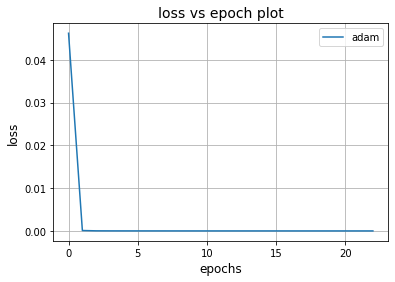

In [70]:
adam_losses = epoch_losses

plt.plot(range(len(adam_losses)), adam_losses, label= 'adam')
plt.xlabel('epochs', fontsize= 12) 
plt.ylabel('loss', fontsize = 12)    
plt.title('loss vs epoch plot', fontsize= 14)
plt.legend()
plt.grid(True)                        
plt.show()

### <font color='blue'>Comparision plot between epochs and loss with different optimizers</font>

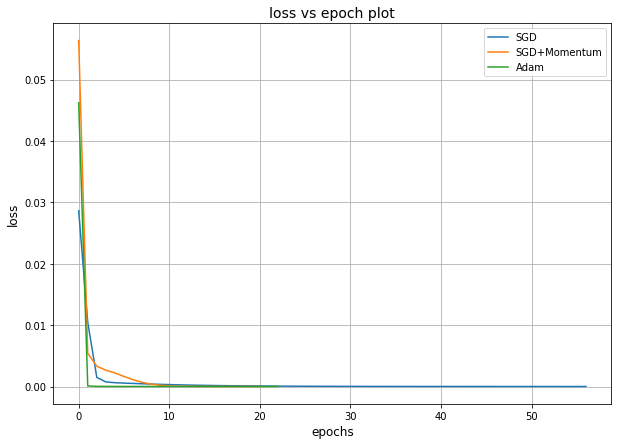

In [71]:
plt.figure(figsize = (10,7))
plt.plot(range(len(SGD_losses)), SGD_losses, label = 'SGD')
plt.plot(range(len(SGD_momentum_losses)), SGD_momentum_losses, label = 'SGD+Momentum')
plt.plot(range(len(adam_losses)), adam_losses, label = 'Adam')
plt.xlabel('epochs', fontsize= 12) 
plt.ylabel('loss', fontsize = 12)    
plt.title('loss vs epoch plot', fontsize= 14)
plt.legend()
plt.grid(True)                        
plt.show()

<font color='blue'>Zooming the comparison plot</font>

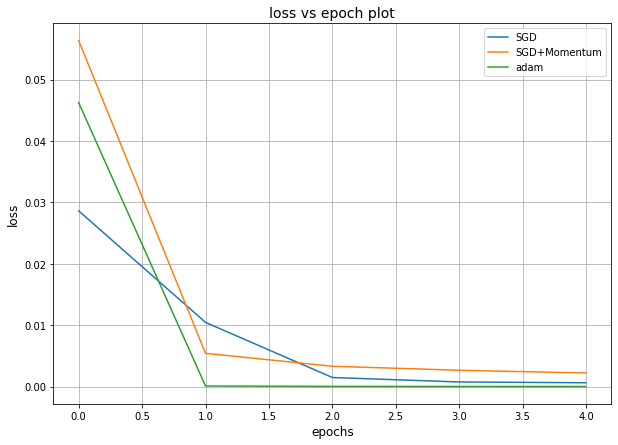

In [72]:
plt.figure(figsize = (10,7))
plt.plot(range(5), SGD_losses[:5], label = 'SGD')
plt.plot(range(5), SGD_momentum_losses[:5], label = 'SGD+Momentum')
plt.plot(range(5), adam_losses[:5], label ='adam')
plt.xlabel('epochs', fontsize= 12) 
plt.ylabel('loss', fontsize = 12)    
plt.title('loss vs epoch plot', fontsize= 14)
plt.legend()
plt.grid(True)                        
plt.show()

Observation:

  1. We can see that Adam is faster in converging than vanilla SGD and SGD with momentum
  2. Also, SGD with momentum is slightly faster in converging than vanilla SGD